[  1   2   4   8  16  32  64 128]
[0.00000000e+00 0.00000000e+00 9.96828079e-04 2.99358368e-03
 2.09789276e-02 1.35601282e-01 9.90348577e-01 6.74897766e+00]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 9.96351242e-04
 5.98430634e-03 5.08975983e-02 4.19876099e-01 3.28218460e+00]


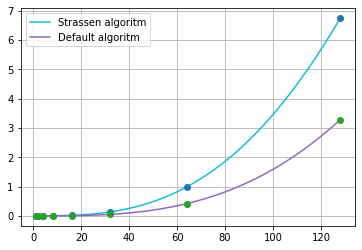

In [247]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt

def Graf(n,timeStrassen,timeDefault):
    fs = np.polyfit(n,timeStrassen,4)
    fd = np.polyfit(n,timeDefault,4)
    xx = np.linspace(1,2**(n.shape[0]-1),500)  
    uu = np.linspace(1,2**(n.shape[0]-1),500)

    yyS = np.polyval(fs, xx)
    yyD = np.polyval(fd, uu)
    
    plt.plot(xx, yyS, color = 'tab:cyan',label='Strassen algoritm')
    plt.plot(uu, yyD, color = 'tab:purple',label='Default algoritm')
    plt.plot(n, timeStrassen ,'o', color = 'tab:blue')
    plt.plot(n, timeDefault,'o', color = 'tab:green')
    plt.grid()
    plt.legend()
    pass

def Gen(n):
    A = np.random.randint(1,20, size=(n,n))
    B = np.random.randint(1,20, size=(n,n))
    return A, B



def defaultProduct(A, B):
    n = A.shape[0]
    C = np.zeros((n*n), dtype=np.int).reshape(n,n)
    if n == 1:
        C[0][0] = A[0][0] * B[0][0]
    else:
        for i in range(n):
            for k in range(n):
                for j in range(n):
                    C[i][j] += A[i][k] * B[k][j]
    return C


def strassen(A,B):
    n = A.shape[0]
    C = np.zeros((n*n), dtype=np.int).reshape(n,n)
    if n == 1:
        C[0][0] = A[0][0] * B[0][0]
    else:
        k = int(n/2) 

        A11,A21,A12,A22 = A[:k,:k], A[k:, :k], A[:k, k:], A[k:, k:]
        B11,B21,B12,B22 = B[:k,:k], B[k:, :k], B[:k, k:], B[k:, k:]

        S1 = B12 - B22
        S2 = A11 + A12
        S3 = A21 + A22
        S4 = B21 - B11
        S5 = A11 + A22
        S6 = B11 + B22
        S7 = A12 - A22
        S8 = B21 + B22
        S9 = A11 - A21
        S10= B11 + B12

        P1 = strassen(A11, S1)
        P2 = strassen(S2, B22)
        P3 = strassen(S3, B11)
        P4 = strassen(A22, S4)
        P5 = strassen(S5, S6)
        P6 = strassen(S7, S8)
        P7 = strassen(S9, S10)

        C[:k,:k] = P5 + P4 - P2 + P6
        C[:k, k:] = P1 + P2
        C[k:, :k] = P3 + P4
        C[k:, k:] = P5 + P1 - P3 - P7

    return C

g =8
timeStrassen= np.zeros((g),dtype=np.float)
timeDefault= np.zeros((g),dtype=np.float)
n = np.arange(g)
for i in range(g):

    k = 2**i
    A,B = Gen(k)
    n[i]=k;
    start_time=time.time()
    C = strassen(A, B)
    delta_time=time.time() - start_time
    timeStrassen[i] = delta_time
    #print(delta_time)
    #print(n)
    #print(C)


    start_time=time.time()
    C = defaultProduct(A,B)
    delta_time=time.time() - start_time
    timeDefault[i] = delta_time
    #print(delta_time)
    #print(C)
    
    
print(n)
print(timeStrassen)
print(timeDefault)

Graf(n,timeStrassen,timeDefault)

